# Sebastián Alvarado Pérez

### Paqueterias necesarias

In [1]:
using LinearAlgebra
using Plots
using LaTeXStrings

### Funciones

In [2]:
# an(n,sigm,gam)=(exp(-n^2/(4*sigm^2))/(4*sqrt(2*pi*sigm^2)))*cos(gam/2)
# bn(n,sigm,gam,phi)=(exp(-n^2/(4*sigm^2))/(4*sqrt(2*pi*sigm^2)))*sin(gam/2)*exp(phi*im)
# bn(n,sigm,gam)=(exp(-n^2/(4*sigm^2))/(4*sqrt(2*pi*sigm^2)))*sin(gam/2)


#coeficientes iniciales

an(n,sigm,gam)=sqrt(exp(-n^2/(2*sigm^2))/(sqrt(2*pi*sigm^2)))*cos(gam/2)    
bn(n,sigm,gam,phi)=sqrt(exp(-n^2/(2*sigm^2))/(sqrt(2*pi*sigm^2)))*sin(gam/2)*exp(phi*im)
bn(n,sigm,gam)=sqrt(exp(-n^2/(2*sigm^2))/(sqrt(2*pi*sigm^2)))*sin(gam/2)

bn (generic function with 2 methods)

In [3]:
function QuanWal_1D_Gauss(n::Int64,H::Matrix{Float64},sigm,gam,phi=0,F=5)  


    kb=[[1,0],[0,1]]     #BASE USUAL es un vector de vectores que contenga cada uno |+> y |->

    #Ejemplo de regla de correspondencia 
    # -4-->1
    # -3-->2
    # -2-->3
    # -1-->4
    # 0-->5
    # 1-->6
    # 2-->7
    # 3-->8
    # 4-->9
    ###########################################
    ##########CONDICIONES INICIALES#############
    P=sigm*F*2+1 # Número impar o número de estados en la linea se usa que es una distr gaussianda para colocar los siginificativos
                 # es decir se usa la sigma para calcular el núméro de espacios

    Pcen=Int64(((P-1)/2)+1)  #Buscamos el centro del arreglo en indices si el impar es 9 el centro es el 5
    #println(Pcen)
    init=-(Pcen-1)          # ahora buscamos el número que corresponde a la posición de la teoria si esn 9 entoces es -4
    #println(init)

    A0=Array{Vector{ComplexF64}}(undef, P) #Numero de qbits iniciales
    @inbounds for i=1:P ## Llenamos los estados con los qbits iniciales con an y bn
        #println(i,"-->",init+(i-1))
        a=an(init+(i-1),sigm,gam)          # usamos la condicion inicial de un estado de un gaussian walker
        b=bn(init+(i-1),sigm,gam,phi)          # usamos la condicion inicial de un estado de un gaussian walker
        A0[i]=[b,a] #### Empieza con quiralidad derecha
    end;
    ##########################################
    ##########################################


    ############Rellenado de espacios##################
    #######Condicion inicial con final################

    PP=P+(2*n) # agregar nuevos lugares
    PPcen=Int64(((PP-1)/2)+1) #Lugar del centro del nuevo espacio que se construye

    init2=-(PPcen-1)   # buscamos el número que corresponde en la "frotnera" inicial si es 9-->-4

    A=Array{Vector{ComplexF64}}(undef, PP) #Numero de qbits Finales
    B=Array{Vector{ComplexF64}}(undef, PP)

    @inbounds for i=1:PP #rellenamos con ceros
        A[i]=[0,0]
        B[i]=[0,0]
    end;

    re0=PPcen-Int64((P-1)/2) # del centro restamos P-1/2 unidades para rellenar con los A0
     @inbounds for i=re0:re0+P-1     #Rellenamos desde el indice re0 hasta re0+P-1
         A[i]=A0[i-re0+1]          
     end;
    ###############################################
    ##############################################



    ##########Dinámica#####################
    for k=0:n-1 ###el número de veces que va iterar
        if k%2==0
            for i=re0-k:(re0+P-1)+k 
                if kb[1]*transpose(kb[1])*(H*A[i]) != [0+0im,0+0im] #Si la proyección |L><L|H|phi> es diferente de 0
                    B[i-1]=B[i-1]+kb[1]*transpose(kb[1])*(H*A[i])  #entonces en B escribira el nuevo qbit H|phi> en la posición n-1
                end                                                 #Sumandola a la anterior que estaba allí
                if kb[2]*transpose(kb[2])*(H*A[i]) != [0+0im,0+0im] #Si la proyección |R><R|H|phi> es diferente de 0
                    B[i+1]=B[i+1]+kb[2]*transpose(kb[2])*(H*A[i])   #entonces en B escribira el nuevo qbit H|phi> en la posición n+1
                end                                                  #Sumandola a la anterior que estaba allí
                for j=re0-k:(re0+P-1)+k 
                    A[i]=[0,0]                                     #Por último se reescribe A para que quede en ceros [0,0]
                end

            end
        else
            for i=re0-k:(re0+P-1)+k
                if kb[1]*transpose(kb[1])*(H*B[i]) != [0+0im,0+0im]
                    A[i-1]=A[i-1]+kb[1]*transpose(kb[1])*(H*B[i])
                end
                if kb[2]*transpose(kb[2])*(H*B[i]) != [0+0im,0+0im]
                    A[i+1]=A[i+1]+kb[2]*transpose(kb[2])*(H*B[i])
                end
                for j=re0-k:(re0+P-1)+k
                    B[i]=[0,0]
                end    
            end
        end
    end
    if n%2==0
        G=A
    else
        G=B
    end
    return G
    ###################################
end

QuanWal_1D_Gauss (generic function with 3 methods)

In [78]:
H=1/sqrt(2)*[1 1; 1 -1];

sigm=5
gam=π/2
phi=π/2
n=100 # Pasos
F=5.0

G=QuanWal_1D_Gauss(n,H,sigm,gam,phi);
Init=Int64((length(G)-1)/2)
Init

125

In [76]:
fnt = Plots.font("sans-serif", 15) # Para gráficar loas labels


Plots.Font("sans-serif", 15, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0))

In [77]:
G[1]

2-element Vector{ComplexF64}:
 3.4246385242869334e-19 + 3.4246385242869325e-19im
                    0.0 + 0.0im

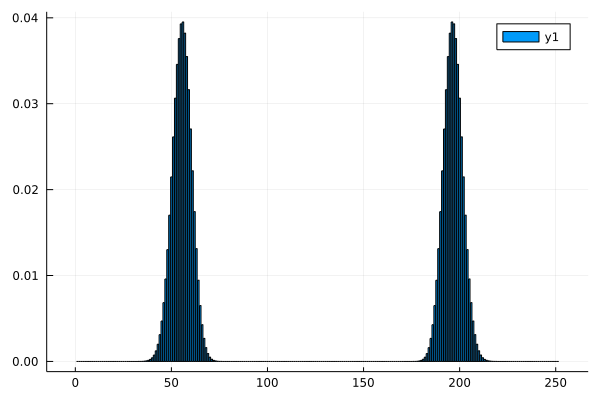

In [74]:
#bar(-Init:1:Init,norm.(G).^2)
bar(1:length(G),norm.(G).^2)

In [41]:
n=150

150

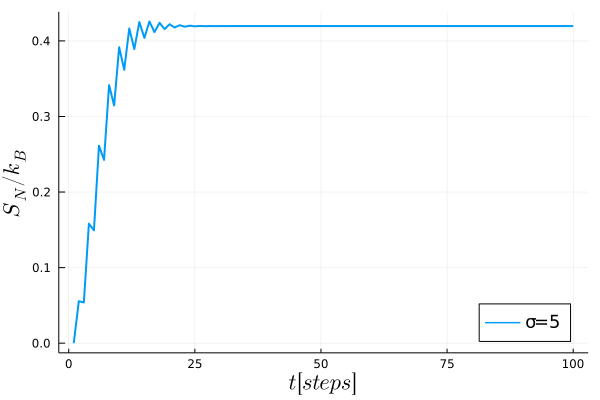

In [53]:
### Entropia Neuman con S/Kb
sigm=5
Sn=zeros(n)

for j=1:n
    G=QuanWal_1D_Gauss(j,H,sigm,gam)
    Dst=zeros(ComplexF64,2,2)
    pos=length(G)
    for i=1:pos
        Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
        Dst[1,2]+=G[i][1]*conj(G[i][2])
        Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
        Dst[2,1]+=conj(G[i][1])*G[i][2]
    end
    lamb=eigvals(Dst)
    Sn[j]=-(lamb[1]*log(lamb[1])+lamb[2]*log(lamb[2]))
end
plot(Sn,ylabel=L"S_N/k_B",xlabel=L"t[steps]",
    guidefont=fnt,label="\\sigma="*"$sigm",legend=:bottomright,
    legendfontsize=12.0,lw = 2)

In [9]:
#Hay que corregir la optimización de S y la quiralidad, es confusa

In [10]:
Sn[end]

0.41961475456105

In [11]:
QuanWal_1D_Gauss(3,H,sigm,gam)

57-element Vector{Vector{ComplexF64}}:
 [0.0001927900097732178 + 0.0im, 0.0 + 0.0im]
 [0.0003146942599981795 + 0.0im, 0.0 + 0.0im]
 [0.0005035089886359213 + 0.0im, 0.0001927900097732178 + 0.0im]
 [0.0007896592823815464 + 0.0im, 0.0003146942599981795 + 0.0im]
 [0.0014066996826539867 + 0.0im, 0.00011792896908948574 + 0.0im]
 [0.002143834944615449 + 0.0im, 0.00016027076238518738 + 0.0im]
 [0.0032051146491249767 + 0.0im, 1.4101685835708408e-5 + 0.0im]
 [0.0047008673122419225 + 0.0im, -6.487214014400306e-5 + 0.0im]
 [0.006764178063852997 + 0.0im, -0.00022972267390840425 + 0.0im]
 [0.009549387120879587 + 0.0im, -0.0005367326217557084 + 0.0im]
 [0.013227583538978547 + 0.0im, -0.0010668526028866508 + 0.0im]
 [0.017978414205021775 + 0.0im, -0.001931310308075705 + 0.0im]
 [0.02397780840156888 + 0.0im, -0.0032761645639440224 + 0.0im]
 ⋮
 [0.009549387120879589 + 0.0im, -0.025596491017825657 + 0.0im]
 [0.0067641780638529984 + 0.0im, -0.01892490899994489 + 0.0im]
 [0.004700867312241923 + 0.0im, -0.0